## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [43]:
import pandas as pd

url1 = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'


In [44]:
alunos = pd.read_csv(url1, sep = ",")

### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [45]:
alunos.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.50,True
1,Ana,18,NaN,False
2,Cátia,27,2.50,False
3,Denis,18,5.00,False
4,Beto,21,10.00,True
5,Bruna,23,NaN,False
6,Dara,21,7.00,True


In [46]:
alunos.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.00,True
14,Paulo,37,NaN,False
15,Mylena,29,7.00,True
16,Lucas,33,NaN,False
17,Nadia,34,8.00,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [47]:
alunos.shape

(18, 4)

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [48]:
alunos.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [49]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [50]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

alunos.describe()

,Idade,Notas
count,18.00,12.00
mean,25.50,6.80
std,6.07,2.20
min,18.00,2.50
25%,21.00,5.45
50%,24.50,7.00
75%,28.75,8.25
max,37.00,10.00


In [51]:
alunos['Nome']

0           Ary
1           Ana
2         Cátia
3         Denis
4          Beto
5         Bruna
6          Dara
7        Carlos
8         Alice
9         Vitor
10       Daniel
11         Igor
12    Sthefanie
13        Mirla
14        Paulo
15       Mylena
16        Lucas
17        Nadia
Name: Nome, dtype: object

### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [52]:
alunos.describe()

,Idade,Notas
count,18.00,12.00
mean,25.50,6.80
std,6.07,2.20
min,18.00,2.50
25%,21.00,5.45
50%,24.50,7.00
75%,28.75,8.25
max,37.00,10.00


## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [53]:
import pandas as pd

In [54]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [55]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']
                      
# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.00,390.00,20.00
4,Apartamento,Higienópolis,1,0,0,48,800.00,230.00,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.00,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.00,301.00,17.00
10,Apartamento,Centro,1,0,0,36,1200.00,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [56]:
df1 = df['Quartos'].mean()
print(f"a média é: {df1} %")

a média é: 2.481568707761622 %


### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [57]:
df1 = len(df['Bairro'].unique()) # len conta quantoss elementos existem na lista e o unique retornas os valore únicos da coluna
print(f"Existem {df1} bairros únicos")

Existem 149 bairros únicos


In [58]:
df['Bairro'].nunique() # nunique faz a contagem de elementos únicos de uma coluna específica de forma direta.

149

### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [59]:
df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending = False)

# ascending=False é usado na função sort_values() para ordenar os valores em ordem decrescente (do maior para o menor).

,Valor
Bairro,
Joá,15500.00
Arpoador,12429.77
Cidade Jardim,12000.00
Ipanema,9487.21
Botafogo,9369.21
...,...
Inhoaíba,650.00
Cosmos,610.00
Santa Cruz,590.00


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

In [60]:
df_bairros = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head()

<Axes: ylabel='Bairro'>

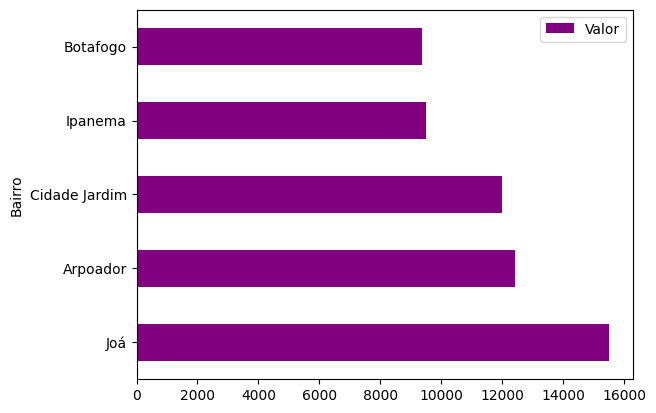

In [61]:
df_bairros.plot(kind = 'barh', color = 'purple')

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [62]:
# Importando novamente os dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
alunos = pd.read_csv(url, sep=",")
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.50,True
1,Ana,18,NaN,False
2,Cátia,27,2.50,False
3,Denis,18,5.00,False
4,Beto,21,10.00,True
5,Bruna,23,NaN,False
6,Dara,21,7.00,True
7,Carlos,19,6.00,True
8,Alice,35,5.60,False
9,Vitor,28,NaN,False


### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [63]:
alunos.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [64]:
alunos = alunos.fillna(0)
alunos


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.50,True
1,Ana,18,0.00,False
2,Cátia,27,2.50,False
3,Denis,18,5.00,False
4,Beto,21,10.00,True
5,Bruna,23,0.00,False
6,Dara,21,7.00,True
7,Carlos,19,6.00,True
8,Alice,35,5.60,False
9,Vitor,28,0.00,False


In [65]:
# salvando os índices das linhas a serem removidas em uma variável
alunos_a_remover = alunos.query('Nome == "Alice" | Nome == "Carlos"').index

### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [66]:
# salvando os índices das linhas a serem removidas em uma variável
alunos_a_remover = alunos.query('Nome == "Alice" | Nome == "Carlos"').index

In [67]:
# removendo as linhas referentes aos alunos "Alice" e "Carlos"
alunos.drop(alunos_a_remover, axis=0, inplace=True)

### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [68]:
selecao = alunos['Aprovado'] == True

In [69]:
alunos[selecao]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.50,True
4,Beto,21,10.00,True
6,Dara,21,7.00,True
12,Sthefanie,26,9.50,True
13,Mirla,25,9.00,True
15,Mylena,29,7.00,True
17,Nadia,34,8.00,True


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [70]:
alunos_aprovados = alunos[selecao]

In [71]:
alunos_aprovados.to_csv('alunos_aprovados.csv', index = False)

### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [72]:
alunos_aprovados.replace(7.0, 8.0)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.50,True
4,Beto,21,10.00,True
6,Dara,21,8.00,True
12,Sthefanie,26,9.50,True
13,Mirla,25,9.00,True
15,Mylena,29,8.00,True
17,Nadia,34,8.00,True


In [73]:
alunos_aprovados = alunos_aprovados.replace(7.0, 8.0)
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.50,True
4,Beto,21,10.00,True
6,Dara,21,8.00,True
12,Sthefanie,26,9.50,True
13,Mirla,25,9.00,True
15,Mylena,29,8.00,True
17,Nadia,34,8.00,True


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [74]:
# Importando novamente os dados
# url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
# alunos = pd.read_csv(url, sep=",")
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.50,True
1,Ana,18,0.00,False
2,Cátia,27,2.50,False
3,Denis,18,5.00,False
4,Beto,21,10.00,True
5,Bruna,23,0.00,False
6,Dara,21,7.00,True
9,Vitor,28,0.00,False
10,Daniel,21,0.00,False
11,Igor,24,4.50,False


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [75]:
alunos['Pontos_extras'] = alunos['Notas'].apply(lambda x: x * 0.4)
alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.50,True,3.00
1,Ana,18,0.00,False,0.00
2,Cátia,27,2.50,False,1.00
3,Denis,18,5.00,False,2.00
4,Beto,21,10.00,True,4.00
5,Bruna,23,0.00,False,0.00
6,Dara,21,7.00,True,2.80
9,Vitor,28,0.00,False,0.00
10,Daniel,21,0.00,False,0.00
11,Igor,24,4.50,False,1.80


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [76]:
alunos['Notas_finais'] = alunos['Notas'] + alunos['Pontos_extras']
alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.50,True,3.00,10.50
1,Ana,18,0.00,False,0.00,0.00
2,Cátia,27,2.50,False,1.00,3.50
3,Denis,18,5.00,False,2.00,7.00
4,Beto,21,10.00,True,4.00,14.00
5,Bruna,23,0.00,False,0.00,0.00
6,Dara,21,7.00,True,2.80,9.80
9,Vitor,28,0.00,False,0.00,0.00
10,Daniel,21,0.00,False,0.00,0.00
11,Igor,24,4.50,False,1.80,6.30


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [77]:
alunos['Aprovados_final'] = alunos['Notas_finais'].apply(lambda x: True if x >= 6 else False)
alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovados_final
0,Ary,20,7.50,True,3.00,10.50,True
1,Ana,18,0.00,False,0.00,0.00,False
2,Cátia,27,2.50,False,1.00,3.50,False
3,Denis,18,5.00,False,2.00,7.00,True
4,Beto,21,10.00,True,4.00,14.00,True
5,Bruna,23,0.00,False,0.00,0.00,False
6,Dara,21,7.00,True,2.80,9.80,True
9,Vitor,28,0.00,False,0.00,0.00,False
10,Daniel,21,0.00,False,0.00,0.00,False
11,Igor,24,4.50,False,1.80,6.30,True


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [84]:
alunos.query('Aprovado == False & Aprovados_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovados_final
3,Denis,18,5.00,False,2.00,7.00,True
11,Igor,24,4.50,False,1.80,6.30,True


In [87]:
selecao = (alunos['Aprovado'] == False) & (alunos['Aprovados_final'] == True)
alunos[selecao]

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovados_final
3,Denis,18,5.00,False,2.00,7.00,True
11,Igor,24,4.50,False,1.80,6.30,True
